In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
# import train_test_split from sklearn
from sklearn.model_selection import train_test_split

In [2]:
folders = ['burger','cat','coke','dog','pizza']


In [3]:
photo_array = []
photo_index = []

folders = ['burger','cat','coke','dog','pizza']
for i,folder in enumerate(folders):
    files= os.listdir(folder)
    for file_ in files:
        path = folder+'/'+file_
        img = cv2.imread(path)
        img = cv2.resize(img, (100,100))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        photo_array.append(img)
        photo_index.append(i)
        
        
        
        




In [5]:
photo_array = np.array(photo_array)

data = photo_array.astype('float32') / 255

In [6]:
#convert list to array
photo_index = np.array(photo_index)

In [7]:
x_train, x_test, y_train, y_test = train_test_split(data, photo_index, test_size=0.2, random_state=42)


In [8]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((5989, 100, 100, 3), (1498, 100, 100, 3), (5989,), (1498,))

In [9]:
# Bring in the sequential api for the generator and discriminator
from tensorflow.keras.models import Sequential
# Bring in the layers for the neural network
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Reshape, LeakyReLU, Dropout, UpSampling2D


In [ ]:
# In the line (None, 6272), (None, ...) represents the batch dimension, and 6272 represents the size of the output produced by that layer.
# The batch dimension (None, ...) indicates that the layer can accept input of any batch size. During training or inference, you typically
# pass a batch of input samples to the model, and the batch size can vary. By using (None, ...), the model is flexible to accept different batch sizes.

# The number 6272 represents the size of the output produced by the layer. In this case, it refers to the number of neurons or units in the 
# output layer. Each unit in the output layer represents a specific feature or aspect that the model is learning to capture.

# Regarding Param #, it represents the number of trainable parameters in that layer. Parameters are the variables that the model learns
# during the training process to make predictions. In a Dense layer, the parameters consist of weights and biases. The Param # indicates 
# the total number of learnable parameters associated with that layer.

In [10]:
def build_generator(): 
    model = Sequential()
    
    # Takes in random values and reshapes it to 7x7x128
    # Beginnings of a generated image
    model.add(Dense(7*7*128, input_dim=128))
    model.add(LeakyReLU(0.2))
    model.add(Reshape((7,7,128)))
    
    # Upsampling block 1 
    model.add(UpSampling2D())
    model.add(Conv2D(128, 5, padding='same'))
    model.add(LeakyReLU(0.2))
    
    # Upsampling block 2 
    model.add(UpSampling2D())
    model.add(Conv2D(128, 5, padding='same'))
    model.add(LeakyReLU(0.2))
    
    # Convolutional block 1
    model.add(Conv2D(128, 4, padding='same'))
    model.add(LeakyReLU(0.2))
    
    # Convolutional block 2
    model.add(Conv2D(128, 4, padding='same'))
    model.add(LeakyReLU(0.2))
    
    # Conv layer to get to one channel
    model.add(Conv2D(1, 4, padding='same', activation='sigmoid'))
    
    return model

In [11]:
generator = build_generator()

In [12]:
generator.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6272)              809088    
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 6272)              0         
                                                                 
 reshape (Reshape)           (None, 7, 7, 128)         0         
                                                                 
 up_sampling2d (UpSampling2D  (None, 14, 14, 128)      0         
 )                                                               
                                                                 
 conv2d (Conv2D)             (None, 14, 14, 128)       409728    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 14, 14, 128)       0         
                                                        

In [13]:
img = generator.predict(np.random.randn(4,128,1))

1/1 [==============================] - 0s 428ms/step


In [18]:
img[0]

array([[[0.49837008],
        [0.49959588],
        [0.50116736],
        [0.5032246 ],
        [0.49875346],
        [0.49431065],
        [0.48600614],
        [0.49400643],
        [0.4986021 ],
        [0.5091982 ],
        [0.5080297 ],
        [0.50756055],
        [0.50456274],
        [0.49290723],
        [0.49972808],
        [0.49391305],
        [0.49918392],
        [0.5087022 ],
        [0.50809973],
        [0.49630207],
        [0.49945274],
        [0.50132656],
        [0.50010884],
        [0.51063865],
        [0.51006705],
        [0.5084398 ],
        [0.5057228 ],
        [0.50348383]],

       [[0.49676692],
        [0.50778276],
        [0.51010877],
        [0.5035166 ],
        [0.50118387],
        [0.50157213],
        [0.50644463],
        [0.51159686],
        [0.51444966],
        [0.5205451 ],
        [0.5206656 ],
        [0.51845056],
        [0.5183044 ],
        [0.5060731 ],
        [0.50977516],
        [0.5098828 ],
        [0.5168602 ],
        

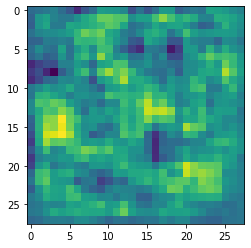

In [19]:
plt.imshow(img[0])